In [1]:
#euler test
import numpy as np

r = np.asarray([1,0,0])
center = np.asarray([0,0,0])
r_centered = r-center
print(r_centered)

a = 90
b = 0
y = -90

from scipy.spatial.transform import Rotation

A = Rotation.from_euler('XYZ',[y, b, a], degrees=True)

rotation_matrix = A.as_matrix()
print(rotation_matrix)


#[190.64 149.49 202.24] -> [280.64        99.50677852 342.22322148]


r_centered_rotated = rotation_matrix@r_centered
r_centered_rotated_shifted = r_centered_rotated+center

print(r_centered_rotated_shifted)

[1 0 0]
[[ 2.22044605e-16 -1.00000000e+00  0.00000000e+00]
 [ 2.22044605e-16  0.00000000e+00  1.00000000e+00]
 [-1.00000000e+00 -2.22044605e-16  2.22044605e-16]]
[ 2.22044605e-16  2.22044605e-16 -1.00000000e+00]


In [2]:
# --- REALITY WAS: --- 
# one ring with fixed euler rotations, sim promises 2500 ppm
# 1. import the b0 map


import numpy as np  
import b0
b0map_iter1 = b0.b0()
filename_to_import_csv_data_from = r'./data/240907/240912_ball_overnight_R120_12pts_bvals_shifted.csv'
#filename_to_import_csv_data_from = r'./data/COMSOL/V1_magnet/240913_ball_R85_9pts_per_radius_before_shim_no_rings_field_components_aligned_bvals_shifted.csv'

b0map_iter1.import_from_csv(filename_to_import_csv_data_from,eulers=[90,0,-90])
# volume from shell init
b0map_iter1.transfer_coordinates_of_the_path_from_cosi_to_magnet(filtering = 1.5,stepsize=10,onesign=True,component=0)

No path object given on construction of b0 object.
 b0 instance initialized without path.
importing b0 object from csv file./data/240907/240912_ball_overnight_R120_12pts_bvals_shifted.csv
No path object given on construction of b0 object.
 b0 instance initialized without path.
warning. path file  /home/cosi/cosi-measure/Software/COSI2/data/240907/240912_ball_overnight_R120_12pts,,,,,,
 not used. path data taken from csv!
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
importing path from a csv file
ROTATING TH

c:\cosi-measure\Software\COSI2\b0.py:316: RuntimeWarning: divide by zero encountered in scalar divide
  if meanField_raw/abs(self.fieldDataAlongPath[idx,component])>filtering:


-1.0030136351183325
-1.0028661145181346
-1.0024657014604539
-1.0022338833744284
-1.001812395945291
-1.001475206001981
-1.0011380160586711
-1.0010115698299298
-1.0009272723441023
-1.0008008261153611
-1.000653305515163
-1.0006322311437061
-1.0006954542580768
-1.0007165286295336
-1.000821900486818
-1.0010537185728434
-1.001159090430128
-1.0014119828876105
-1.001643800973636
-1.0019177678025752
-1.0021706602600577
-1.0025078502033677
-1.0027396682893934
-1.0029714863754189
-1.0029714863754189
-1.0027396682893934
-1.0024024783460832
-1.0021917346315146
-1.001980990916946
-1.0017070240880064
-1.0014962803734377
-1.0012012391730416
-1.0009694210870161
-1.0008429748582748
-1.0006954542580768
-1.000611156772249
-1.0006954542580768
-1.0006954542580768
-1.0007376030009905
-1.0009061979726455
-1.0010326442013866
-1.0011380160586711
-1.0013487597732398
-1.0015595034878084
-1.0018966934311184
-1.002107437145687
-1.0022549577458852
-1.0020020652884027
-1.0018334703167477
-1.0017491728309202
-1.001538

In [3]:
#RAW CHECK
i=15
j=0#int(len(b0map_iter1.zPts)/2)#-2#int(len(b0map_iter1.yPts)/2)
k=int(len(b0map_iter1.zPts)/2)



print('x',b0map_iter1.xPts[i])
print('y',b0map_iter1.yPts[j])
print('z',b0map_iter1.zPts[k])


print(b0map_iter1.b0Data[i,j,k,0])
#b0map_iter1.b0Data[i,j,k,0] = 100


x 39.8795180722891
y -120.09106192210709
z -0.02942000560381075
nan


19.254201590324808
mean, mT:  -47.49468006182381
low, mT: -47.675 
high, mT: -47.367


<Figure size 640x480 with 0 Axes>

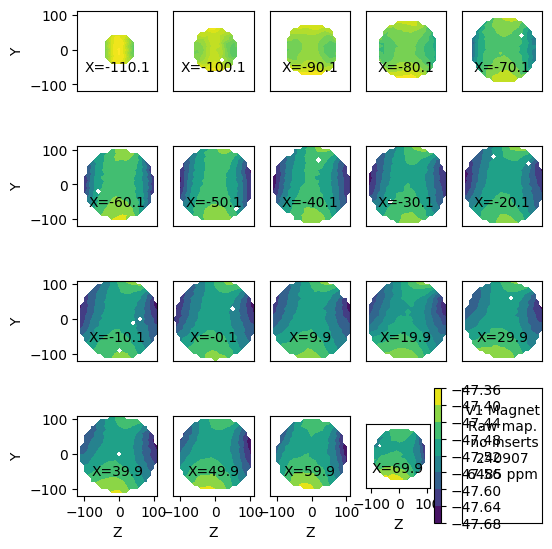

In [4]:

# initial field (RAW)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals = b0map_iter1.xPts
y = b0map_iter1.yPts
z = b0map_iter1.zPts

FieldMeasured = b0map_iter1.b0Data[:,:,:,0]


fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(6, 7))

#xvals = b0map_comsol.xDim_SPH_fine
print((len(b0map_iter1.path.r))**(1/3))


print('mean, mT: ',np.nanmean(FieldMeasured))
print('low, mT:',np.nanmin(FieldMeasured),'\nhigh, mT:',np.nanmax(FieldMeasured))

homoinit = (np.nanmax(FieldMeasured)-np.nanmin(FieldMeasured))/np.nanmean(FieldMeasured)*1e6

      
for i in range(4):
    for j in range(5):
        if i*5+j >=19:
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(0.5, 0.6, 'V1 Magnet\nRaw map.\n no inserts\n240907\n%.0f ppm'%abs(homoinit), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        #xxx = axes[i,j].imshow(FieldMeasured[i*5+j,:,:],clim=[np.nanmin(FieldMeasured),np.nanmax(FieldMeasured)],origin = 'lower',extent=[-120,120,-120,120])
        xxx = axes[i,j].contourf(z,y,FieldMeasured[i*5+j,:,:],vmin=np.nanmin(FieldMeasured),vmax=np.nanmax(FieldMeasured))
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%b0map_iter1.xPts[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==3:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Z')
        axes[i,j].set_ylabel('Y')
        axes[i,j].set_aspect(1)
        
        plt.xlabel('Z')
        plt.ylabel('Y')
plt.subplots_adjust(hspace=0)





In [5]:

# spherical decomposition
diameter_of_sphere = b0map_iter1.path.radius*2
order = 11
resolution_of_sph_decomp = 10
print(diameter_of_sphere)

b0map_iter1.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)

resolution_of_sph_fit=5
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

b0map_iter1.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)


240.00573911701895
[23, 24, 24]
Mean field strength in 24 cm sphere: -47.49 mT
Inhomogeneity in 24 cm sphere: -6485 ppm
Inhomogeneity of fit: 6861 ppm
Error: -1741 ppm
saved numpy array as ./data/tmp/SpHData.npy
interpolating field with sph order 11, resol 10 mm
sph coefficients loaded
making a fine coordinate grid
Inhomogeneity of fit: 6523 ppm
saved numpy array as ./data/tmp/B0_interpolated.npy


In [6]:
# interpolated check
i=4
j=int(len(b0map_iter1.yDim_SPH_fine)/2)-3
k=-4#int(len(b0map_iter1.zDim_SPH_fine)/2)

print('xfine',b0map_iter1.xDim_SPH_fine[i])
print('yfine',b0map_iter1.yDim_SPH_fine[j])
print('zfine',b0map_iter1.zDim_SPH_fine[k])
print('B0interp',b0map_iter1.interpolatedField[i,j,k])

coordinate_grid = b0map_iter1.coord_grid_fine
xx = coordinate_grid[0]
yy = coordinate_grid[1]
zz = coordinate_grid[2]

print('x grid',xx[i,j,k])
print('y grid',yy[i,j,k])
print('z grid',zz[i,j,k])

xfine -80.00191303900633
yfine -30.00071738962737
zfine 90.0021521688821
B0interp nan
x grid -30.00071738962737
y grid -80.00191303900633
z grid 90.0021521688821


In [8]:
#calculate preliminary homogeneity
rawdata = b0map_iter1.fieldDataAlongPath
filteredB0vals = np.zeros(len(rawdata))

for idx,val in enumerate(rawdata):
    B0 = val[0]
    if B0 == 0:
        val = rawdata[idx-1]
        B0=val[0]
    filteredB0vals[idx]=B0
    
print(max(filteredB0vals))
print(min(filteredB0vals))
meanval = np.nanmean(filteredB0vals)

for idx,val in enumerate(filteredB0vals):
    if abs(val/meanval)>2 or abs(val/meanval)<0.5 or val/meanval<0:
        filteredB0vals[idx] = filteredB0vals[idx-1]
        print(val)
        
maxval = max(filteredB0vals)
minval = min(filteredB0vals)
meanval = np.nanmean(filteredB0vals)

print(maxval)
print(minval)
print(meanval)

homoshellinit = (maxval-minval)/meanval*1e6

print('homo on raw data: %.0f'%homoshellinit)



-47.367
-47.675
-47.367
-47.675
-47.49470622022975
homo on raw data: -6485


In [9]:
print(np.nanmin(b0map_iter1.fieldDataAlongPath[:,0]))
print(np.nanmax(b0map_iter1.fieldDataAlongPath[:,0]))
print(np.nanmin(b0map_iter1.b0Data[:,:,:,0]))
print(np.nanmax(b0map_iter1.b0Data[:,:,:,0]))
print(np.nanmin(b0map_iter1.interpolatedField))
print(np.nanmax(b0map_iter1.interpolatedField))





-47.675
0.0
-47.675
-47.367
-47.65079320764249
-47.34100154995108


mean, mT:  -47.49263368741273
low, mT: -47.65079320764249 
high, mT: -47.34100154995108


<Figure size 640x480 with 0 Axes>

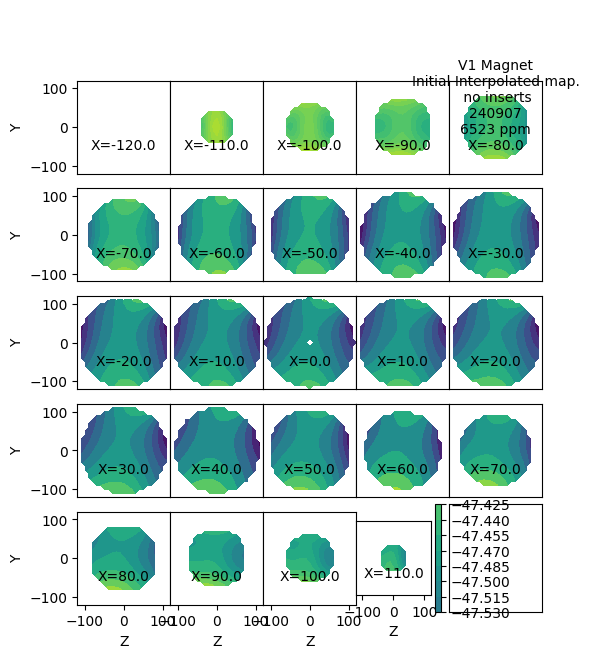

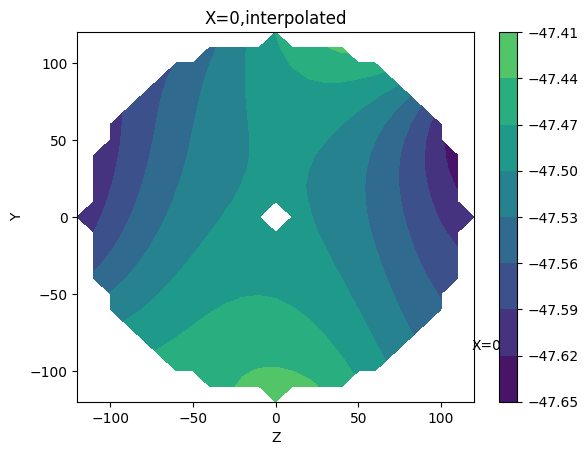

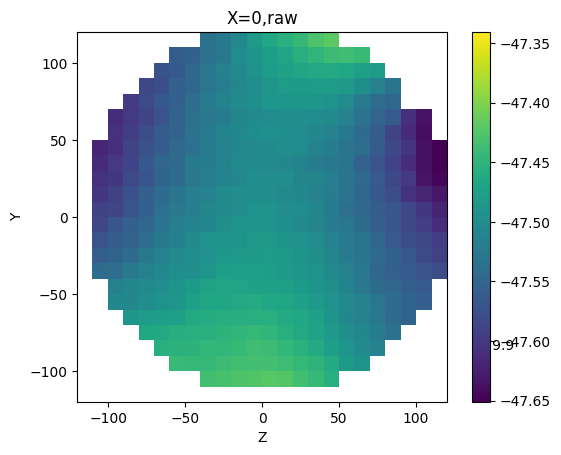

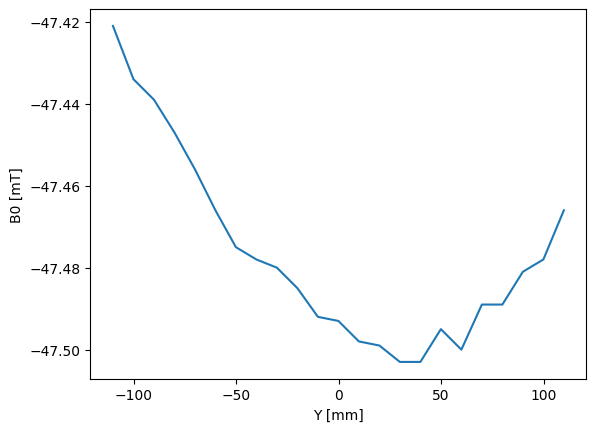

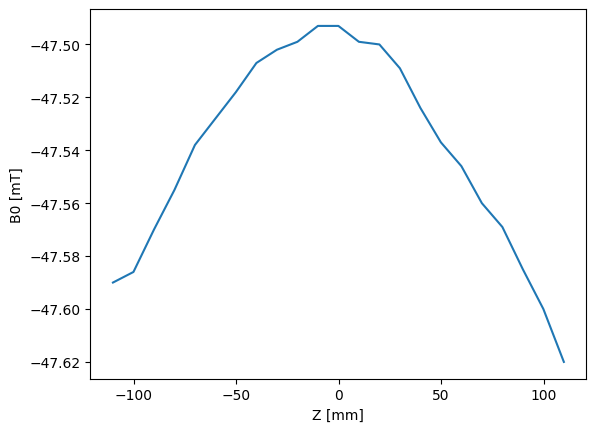

In [10]:

# initial field (INTERPOLATED)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals = b0map_iter1.xPts
y = b0map_iter1.yDim_SPH_fine
z = b0map_iter1.zDim_SPH_fine

FieldMeasured = b0map_iter1.interpolatedField


fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(6, 7))

print('mean, mT: ',np.nanmean(FieldMeasured))
print('low, mT:',np.nanmin(FieldMeasured),'\nhigh, mT:',np.nanmax(FieldMeasured))

homoinit = (np.nanmax(FieldMeasured)-np.nanmin(FieldMeasured))/np.nanmean(FieldMeasured)*1e6

      
for i in range(5):
    for j in range(5):
        if i*5+j >=24:
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(0.5, 5, '\n\n\nV1 Magnet\nInitial Interpolated map.\n no inserts\n240907\n%.0f ppm'%abs(homoinit), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        #xxx = axes[i,j].imshow(FieldMeasured[i*5+j,:,:],clim=[np.nanmin(FieldMeasured),np.nanmax(FieldMeasured)],origin = 'lower',extent=[-120,120,-120,120])
        xxx = axes[i,j].contourf(z,y,FieldMeasured[i*5+j,:,:],vmin=np.nanmin(FieldMeasured), vmax=np.nanmax(FieldMeasured))
        axes[i,j].set_aspect(1)
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%b0map_iter1.xDim_SPH_fine[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==4:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Z')
        axes[i,j].set_ylabel('Y')
        plt.xlabel('Z')
        plt.ylabel('Y')

plt.subplots_adjust(wspace=-0.0, hspace=0)
plt.show()


# plot at x=0
xsliceidx = int(len(b0map_iter1.xDim_SPH_fine)/2)
plt.contourf(y,z,FieldMeasured[xsliceidx,:,:],vmin=np.nanmin(FieldMeasured),vmax=np.nanmax(FieldMeasured))
plt.text(0.5, 0.3, 'X=%.1f'%b0map_iter1.xDim_SPH_fine[xsliceidx], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
plt.xlabel('Z')
plt.ylabel('Y')
plt.title('X=0,interpolated')
plt.colorbar()
plt.show()

xsliceidx = int(len(b0map_iter1.xPts)/2+1)
plt.imshow(b0map_iter1.b0Data[xsliceidx,:,:,0],clim=[np.nanmin(FieldMeasured),np.nanmax(FieldMeasured)],origin = 'lower',extent=[-120,120,-120,120])
plt.text(0.5, 0.3, 'X=%.1f'%b0map_iter1.xPts[xsliceidx], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
plt.xlabel('Z')
plt.ylabel('Y')
plt.title('X=0,raw')
plt.colorbar()
plt.show()

valsalongyatz0 = b0map_iter1.b0Data[xsliceidx,:,xsliceidx,0]
yvals = b0map_iter1.yPts
plt.plot(yvals,valsalongyatz0)
plt.ylabel('B0 [mT]')
plt.xlabel('Y [mm]')
plt.show()

zalsalongyaty0 = b0map_iter1.b0Data[xsliceidx,xsliceidx,:,0]
zvals = b0map_iter1.yPts
plt.plot(zvals,zalsalongyaty0)
plt.ylabel('B0 [mT]')
plt.xlabel('Z [mm]')
plt.show()



In [11]:
print(b0map_iter1.xDim_SPH_fine)

[-120.00286956 -110.00263043 -100.0023913   -90.00215217  -80.00191304
  -70.00167391  -60.00143478  -50.00119565  -40.00095652  -30.00071739
  -20.00047826  -10.00023913    0.           10.00023913   20.00047826
   30.00071739   40.00095652   50.00119565   60.00143478   70.00167391
   80.00191304   90.00215217  100.0023913   110.00263043  120.00286956]


In [11]:

#??? lets generate fields of all inserts, all rings.
#??? Insert X ring 0, minimal Z, Y~0, all rotations pointing to -Z direction (alpha=-pi/2) 0 reference

In [43]:
# shim magnets positinoing

mu                  = 1e-7

magSizeOuter        = 6*1e-3        #size of shim magnets

bRem                = 1.35 # [T]      #remanence field of shim magnets

#shim tray configuration
def ringposFromTrayNr(trays_ocp):
    trayslitspacing = 9e-3 # [m]
    coordinates = []
    for tray_pos in trays_ocp:
        coordinate = trayslitspacing*tray_pos-4.5e-3 if tray_pos>0 else trayslitspacing*tray_pos+4.5e-3
        coordinates.append(coordinate)
    return coordinates


shimRadius          = 276*1e-3#276*1e-3#!!!TMP 276*1e-3#276*1e-3 <- was set by Tom!      # radius on which the shim magnets are placed

trays_occupied = [1] #[-18,-5,1,12] <- 27mm best  [-7,-5,1,14] 997
ringPositions       = ringposFromTrayNr(trays_occupied)#[-121.5*1e-3, -40.5*1e-3, 31.5*1e-3, 121.5*1e-3]#np.linspace(-ringspacingouter,ringspacingouter,4)#np.linspace(-0.1755,0.1755,4)          #np.linspace(-0.2295, .2295, 4) #Z positions to place shin rubgs
print(np.array(ringPositions)*1e3,'mm')


[4.5] mm


In [44]:

magsPerSegment      = 7             # number of magnets peer shim tray segment
anglePerSegment     = 19.25 #the angular distance in degrees between the furthest magnets in a shim tray (span of magnets in shim tray)
numSegments         = 12 #corresponds to the number of shim trays


segmentAngles       = np.linspace(0,360, numSegments, endpoint = False)

magAngles           = np.linspace(-anglePerSegment/2, anglePerSegment/2, magsPerSegment) 

print('let us position some magnets on a circumference of a R=%.0f mm YZ circle with X=0'%(shimRadius*1000))

positions = []
insert_nr = 9 # IRL 3!!!
for ringPosition in ringPositions:
    for segmentAngle in segmentAngles:
        for magAngle in magAngles:
            position = [ringPosition,shimRadius*np.cos((segmentAngle+magAngle)*np.pi/180), shimRadius*np.sin((segmentAngle+magAngle)*np.pi/180)]
            # ONLY INSERT 3, y~0, min(|z|)
            #if (segmentAngle > 360/12*(insert_nr-0.5)) and (segmentAngle < 360/12*(insert_nr+0.5)):
                # choose only Ring 0:
                #if ringPosition == ringPositions[0]:
            #position[0] = -0.02 #!!!!! TEMP!!!!!
                    #position[2] -=0.03 #!!!!! TEMP!!!!!
                    #print(360/12*(insert_nr-0.5),360/12*(insert_nr+0.5))
            positions.append(position)
                
print(len(positions))

for pos in positions:
    print(pos[0],pos[1],pos[2])


let us position some magnets on a circumference of a R=276 mm YZ circle with X=0
84
0.0045 0.27211479674710887 -0.04614691096140277
0.0045 0.2742709847847707 -0.030845208788272026
0.0045 0.27556740718070843 -0.015446815196073495
0.0045 0.276 0.0
0.0045 0.27556740718070843 0.0154468151960735
0.0045 0.2742709847847707 0.030845208788272037
0.0045 0.27211479674710887 0.04614691096140277
0.0045 0.2587317822093368 0.09609300117480107
0.0045 0.2529482447387227 0.11042275799670676
0.0045 0.2463717826715406 0.12440636922299107
0.0045 0.2390230114445051 0.13799999999999998
0.0045 0.2309249674754671 0.15116103795771738
0.0045 0.22210303595045067 0.16384822678806393
0.0045 0.21258487124793404 0.17602179557230782
0.0045 0.17602179557230782 0.21258487124793404
0.0045 0.16384822678806393 0.22210303595045067
0.0045 0.15116103795771738 0.2309249674754671
0.0045 0.13800000000000004 0.23902301144450508
0.0045 0.12440636922299107 0.2463717826715406
0.0045 0.11042275799670671 0.2529482447387227
0.0045 0.09

magnet created, dipole points to  [0. 1. 0.]
ROTATION OF EXPENSIVE MAGNET:0
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
1.35
x vector length in single magnet simulation:  25
computing field of one shim magnet at  0.0045 0.27211479674710887 -0.04614691096140277
magnet created, dipole points to  [0. 1. 0.]
ROTATION OF EXPENSIVE MAGNET:0
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
1.35
x vector length in single magnet simulation:  25
computing field of one shim magnet at  0.0045 0.2742709847847707 -0.030845208788272026
magnet created, dipole points to  [0. 1. 0.]
ROTATION OF EXPENSIVE MAGNET:0
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
1.35
x vector length in single magnet simulation:  25
computing field of one shim magnet at  0.0045 0.27556740718070843 -0.015446815196073495
magnet created, dipole points to  [0. 1. 0.]
ROTATION OF EXPENSIVE MAGNET:0
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
1.35
x vector length in single magnet simulation:  25
computing field of one shim ma

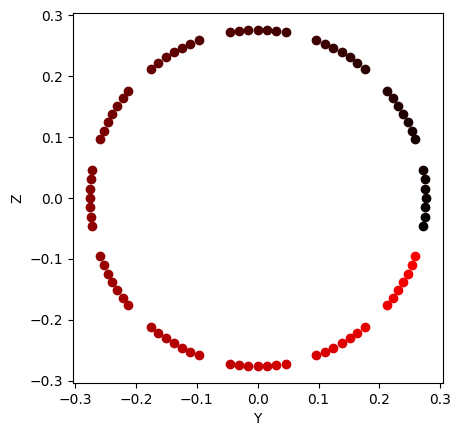

In [46]:
import matplotlib.pyplot as plt
axs = plt.axes()
for idx,position in enumerate(positions):

    axs.scatter(position[1],position[2],color = [idx/len(positions),0,0])
    
axs.set_aspect(1)
plt.xlabel('Y')
plt.ylabel('Z')


initialField = b0map_iter1.interpolatedField
initialField = b0map_iter1.interpolatedField
numMags = len(positions)
coordinate_grid = b0map_iter1.coord_grid_fine



magnetFields = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)
magnetFields_fair = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)


def magnetization(bRem, dimensions, shape = 'cube', evalDistance = 1):
    #Use the analytical expression for the z component of a cube magnet to estimate
    #dipole momentstrength for correct scaling. Dipole approximation only valid 
    #far-ish away from magnet, comparison made at 1 meter distance.
    if shape == 'cube':
        b_analytic = (bRem/np.pi) *(np.arctan2(dimensions**2, 2*evalDistance *np.sqrt(4*(evalDistance**2) + 2*(dimensions**2)))-\
                        np.arctan2(dimensions**2, 2*(dimensions + evalDistance)*\
                                   np.sqrt(4*((dimensions+evalDistance)**2)+2*(dimensions**2))))
    
        dip_mom = b_analytic * (dimensions/2 + evalDistance)**3 /(2*mu) #strength of the dipole moment
    
    return dip_mom


from utils import shimming_magnet

shimming_magnets = []

DSV = 2*max(b0map_iter1.xDim_SPH_fine)#b0map.path.radius*2

dip_mom = magnetization(bRem=bRem,dimensions=magSizeOuter)
dip_vec = mu*np.array([0,dip_mom,0]) #initially along y


for idx1, position in enumerate(positions):
    magnet = shimming_magnet.shimming_magnet(position=position,rotation_yz=0)
    magnet.bRem = bRem# 1.35 T
    magnet.render_field(grid=coordinate_grid)
    #magnetFields[:,:,:,:,idx1] = magnet.singleMagnet(position, grid=coordinate_grid)
    magnetFields[:,:,:,:,idx1] = magnet.OLD_singleMagnet(position=position,dipoleMoment = dip_vec, 
                                                         simDimensions=[DSV*1e-3,DSV*1e-3,DSV*1e-3],
                                                         resolution=1/resolution_of_sph_fit*1e3,
                                                         plotFields=False)[:,:,:,:] #singleMagnet(position, grid=coordinate_grid)

    #magnetFields_fair[:,:,:,:,idx1] = magnet.singleMagnet(position=position,grid=coordinate_grid,plotFields=False)

    shimming_magnets.append(magnet)
    print(magnet)

magnetFields *= 1e3

print(DSV)

magnet at  [  4.5        272.11479675 -46.14691096]


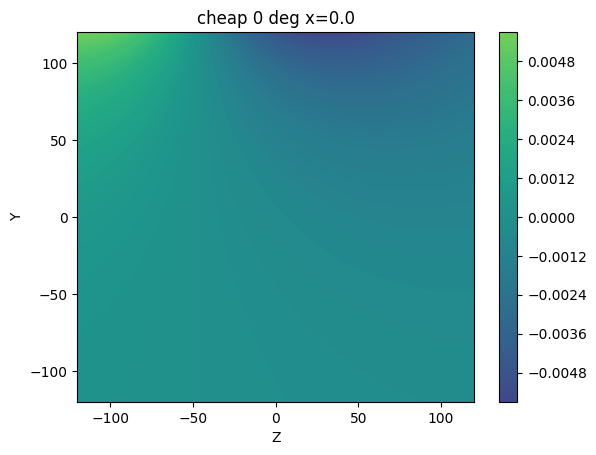

ROTATION OF EXPENSIVE MAGNET:0
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
1.35


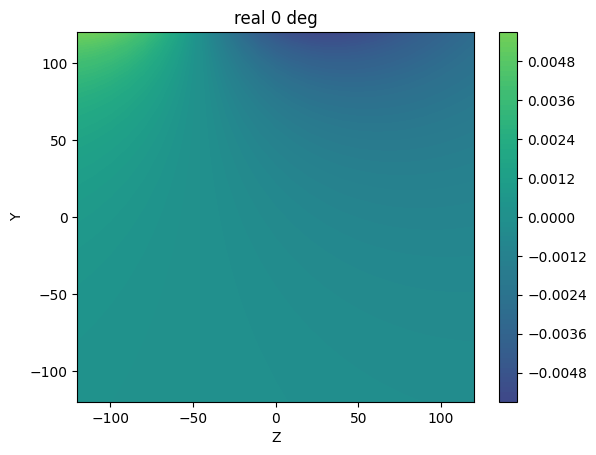

magnet at  [  4.5        272.11479675 -46.14691096]


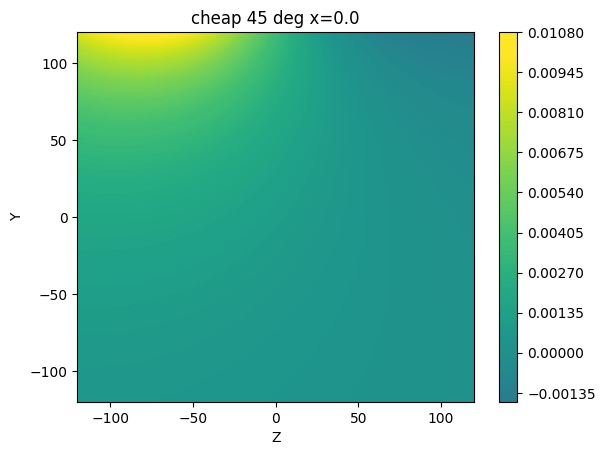

ROTATION OF EXPENSIVE MAGNET:45
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
1.35


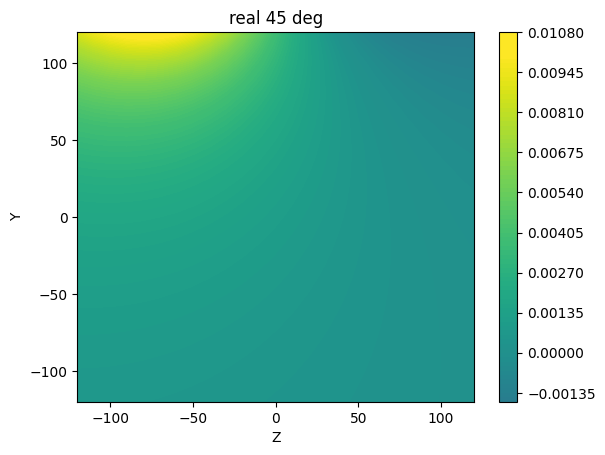

magnet at  [  4.5        272.11479675 -46.14691096]


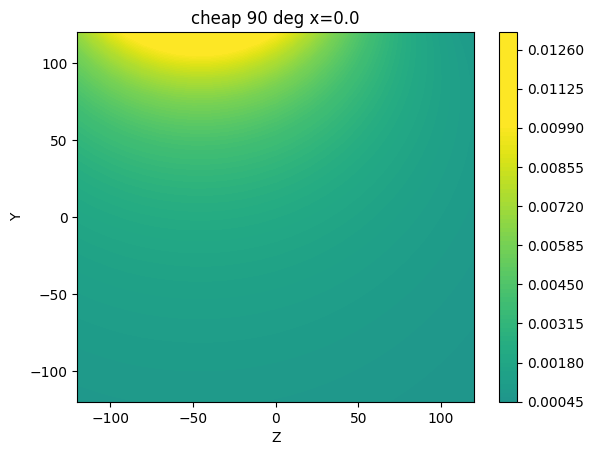

ROTATION OF EXPENSIVE MAGNET:90
[0.00000000e+00 1.42088363e-24 2.32047907e-08]
1.35


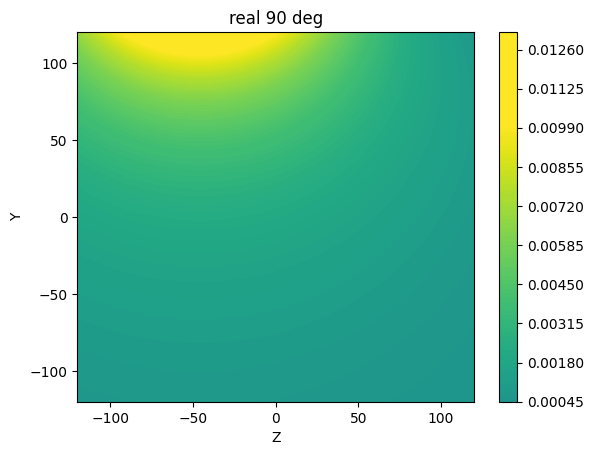

magnet at  [  4.5        272.11479675 -46.14691096]


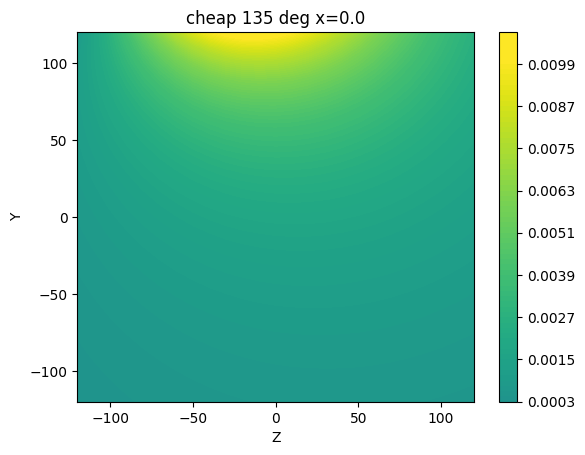

ROTATION OF EXPENSIVE MAGNET:135
[ 0.00000000e+00 -1.64082649e-08  1.64082649e-08]
1.35


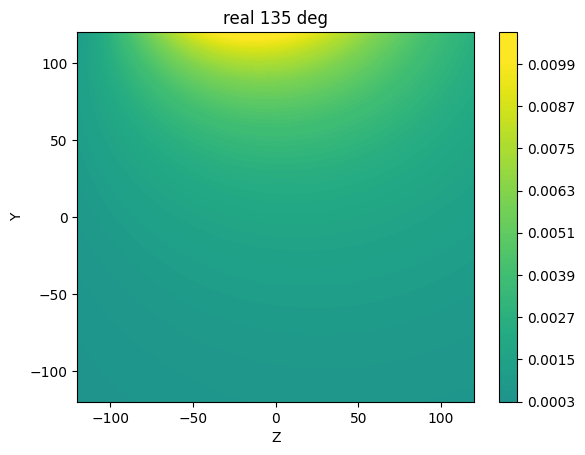

magnet at  [  4.5        272.11479675 -46.14691096]


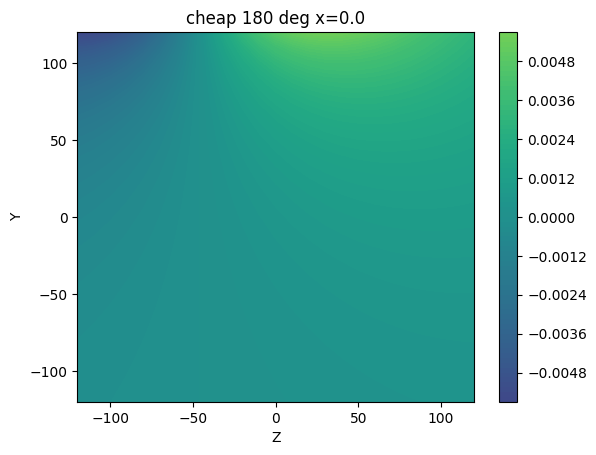

ROTATION OF EXPENSIVE MAGNET:180
[ 0.00000000e+00 -2.32047907e-08  2.84176727e-24]
1.35


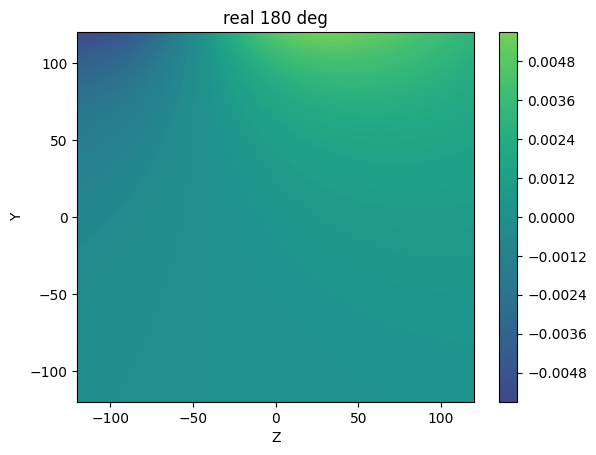

magnet at  [  4.5        272.11479675 -46.14691096]


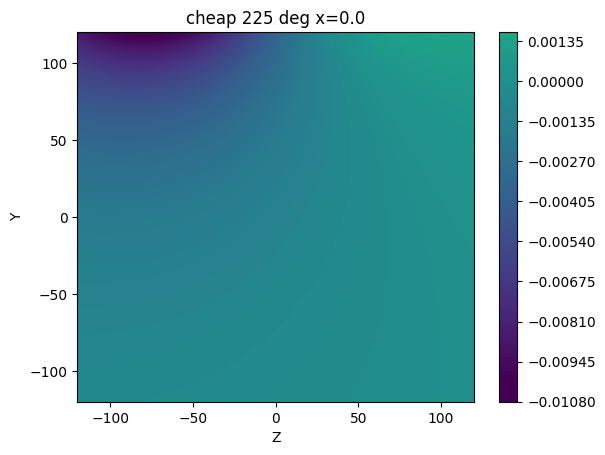

ROTATION OF EXPENSIVE MAGNET:225
[ 0.00000000e+00 -1.64082649e-08 -1.64082649e-08]
1.35


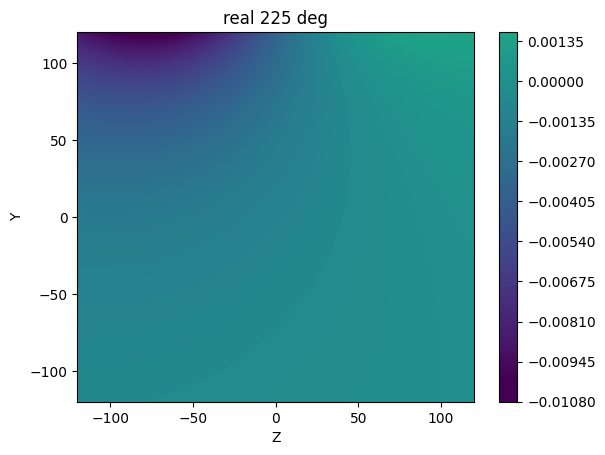

magnet at  [  4.5        272.11479675 -46.14691096]


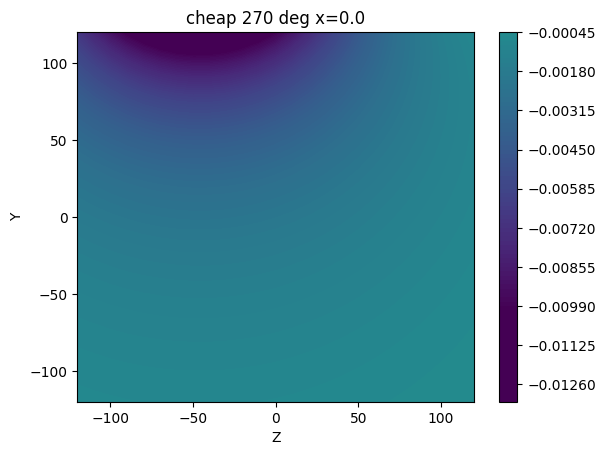

ROTATION OF EXPENSIVE MAGNET:270
[ 0.00000000e+00 -4.26265090e-24 -2.32047907e-08]
1.35


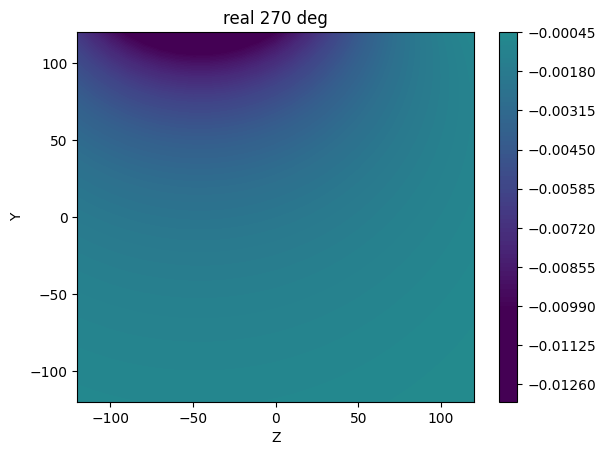

magnet at  [  4.5        272.11479675 -46.14691096]


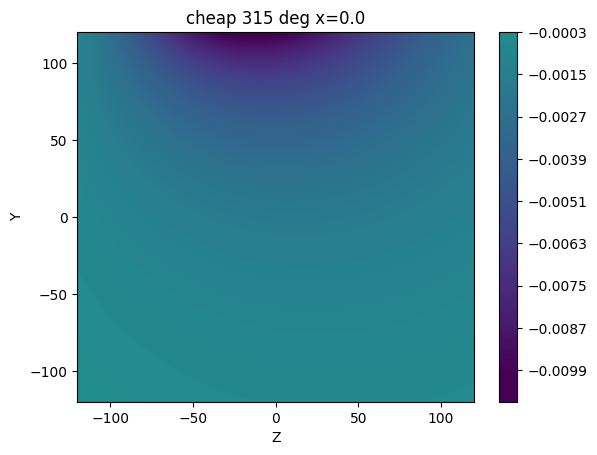

ROTATION OF EXPENSIVE MAGNET:315
[ 0.00000000e+00  1.64082649e-08 -1.64082649e-08]
1.35


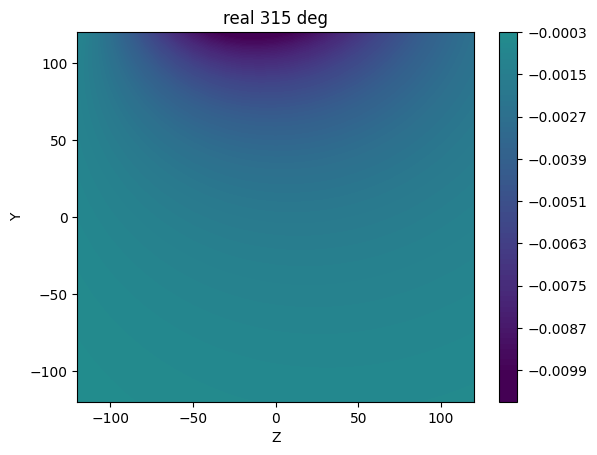

In [47]:
# cheap vs real fields
# DO NOT RUN
plt.cla()

x = b0map_iter1.xDim_SPH_fine*1e0
y = b0map_iter1.yDim_SPH_fine*1e0
z = b0map_iter1.zDim_SPH_fine*1e0

magnet_index = 0
yzsliceidx = int(len(x)/2)
v=max(b0map_iter1.xDim_SPH_fine)


for i in range(8):
    alpha = i*2*np.pi/8
    cheapfield = magnetFields[yzsliceidx,:,:,2,magnet_index]*np.cos(alpha)+magnetFields[yzsliceidx,:,:,1,magnet_index]*np.sin(alpha)
    #cheapfield = magnetFields[yzsliceidx,:,:,2,magnet_index]*np.cos(alpha) # Z
    #cheapfield = magnetFields[yzsliceidx,:,:,2,magnet_index]*np.cos(alpha) # Y

    #plt.imshow(cheapfield,vmin=-1e-3, vmax=1e-3,extent=[-v,v,-v,v],origin='lower')#!!!!!!!!! 240912
    print('magnet at ', np.array(positions[magnet_index])*1e3)
    plt.contourf(y,z,cheapfield,vmin=-1e-2, vmax=1e-2,levels=100)
    plt.title('cheap %.0f deg x=%.1f'%(alpha*180/np.pi,b0map_iter1.xDim_SPH_fine[yzsliceidx]))
    plt.xlabel('Z')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()
    
    magnet = shimming_magnets[magnet_index]
    magnet.rotation_yz = alpha
    magnet.bRem = bRem
    magnet.B0 = magnet.B0*0
    magnet.render_field(grid=coordinate_grid)
    magnet.B0*=1e3

    plt.contourf(y,z,magnet.B0[yzsliceidx,:,:,2],vmin=-1e-2, vmax=1e-2,levels=100)
    plt.title('real %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()
    
    # # DIFF
    # plt.imshow(1e3*(magnet.B0[yzsliceidx,:,:,1])-cheapfield,vmin=-1e-9, vmax=1e-9,extent=[-v,v,-v,v],origin='lower')#!!!!!!!!! 240912
    # plt.title('real-cheap %.0f deg'%(alpha*180/np.pi))
    # plt.xlabel('Z')
    # plt.ylabel('Y')
    # plt.colorbar()
    # plt.show()
    
    
    # ax = plt.subplot(1,1,1)
    # mpbl = ax.contourf(y2d,z2d,(1e3*(magnet.B0[yzsliceidx,:,:,1])),cmap='viridis',levels=64,vmin=-1e-3, vmax=1e-3)#,vmin = -scale, vmax= scale)
    # ax.set_aspect('equal')
    
    # plt.xlabel('Y')
    # plt.ylabel('Z')
    # plt.title('contourf %.0f deg'%(alpha*180/np.pi))
    # plt.show()

ROTATION OF EXPENSIVE MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-90
[ 0.00000000e+00  1.42088363e-24 -2.32047907e-08]
1.35
ROTATION OF EXPENSIVE MAGNET:-90

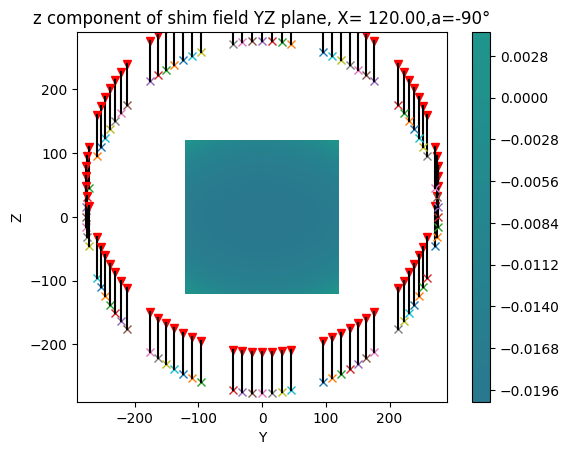

In [48]:
# visualize the field of one insert
resolution = 1/resolution_of_sph_fit*1e3

x = b0map_iter1.xDim_SPH_fine*1e0
y = b0map_iter1.yDim_SPH_fine*1e0
z = b0map_iter1.zDim_SPH_fine*1e0

ONEINSERTFIELD = shimming_magnets[0].B0*0

ax = plt.figure().add_subplot()

for idx in range(84):#range(len(positions)-9): #range(40):#

    position = positions[idx]

    alpha =  -1*np.pi/2#optimized_vector_of_magnet_rotations[idx]#np.pi
    
    magnet = shimming_magnets[idx]
    magnet.rotation_yz = alpha 
    magnet.bRem = bRem
    magnet.render_field(grid=coordinate_grid)
    print(shimming_magnets[idx])

    ONEINSERTFIELD += magnet.B0  #magnetFields[:,:,:,:,idx]#+magnetFields[:,:,:,:,idx+14]

    
    ax.plot(position[1]*1000,position[2]*1000,'x')
    dispveclen = 64 # len of arrow
    direction = [dispveclen*np.cos(-alpha),dispveclen*np.sin(-alpha)] #!!!!!!!!! 240916
    ax.plot(position[1]*1000+direction[0],position[2]*1000+direction[1],'rv')
    
    ax.plot([position[1]*1000,position[1]*1000+direction[0]],[position[2]*1000,position[2]*1000+direction[1]],'k-')

ONEINSERTFIELD*=1e3 #mT
scale = 0.1
yzsliceindex = 24
mpbl = ax.contourf(y,z,(ONEINSERTFIELD[yzsliceindex,:,:,2]),cmap='viridis',levels=64,vmin = -scale, vmax= scale)#,vmin=np.nanmin(ONEINSERTFIELD[:,:,:,2]),vmax=np.nanmax(ONEINSERTFIELD[:,:,:,2]))#,vmin = -scale, vmax= scale)

plt.colorbar(mappable=mpbl)
#ax.plot(min(Y),min(Z),'ko')
#ax.plot(max(Y),max(Z),'ko')

ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_xlim(-290,290)
ax.set_ylim(-290,290)
ax.set_aspect(1)
                
ax.set_title('z component of shim field YZ plane, X= %.2f,a=%.0f°'%(x[yzsliceindex],alpha*180/np.pi))

plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.png',format="png")
plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.pdf',format="pdf")

plt.show()

In [54]:
# RENDERING FIELDS OF SHIM MAGNETS

MagnetsField_simulated = shimming_magnets[2].B0[:,:,:,1]*0
    

for magnet_index, pos in enumerate(positions):
    alpha = -1*np.pi/2#-np.pi/2#np.pi/2#np.pi/2#!TEMP-np.pi/2
    cheapfield_onemagnet = magnetFields[yzsliceidx,:,:,2,magnet_index]*np.cos(alpha)+magnetFields[yzsliceidx,:,:,1,magnet_index]*np.sin(alpha)

    MagnetsField_simulated += cheapfield_onemagnet
    
    
    
#mask the one magnet field:
MagnetsField_simulated*= b0map_iter1.sphere_mask
#MagnetsField_simulated*=1e3 

homo_oneMagnet = (np.nanmax(MagnetsField_simulated)-np.nanmin(MagnetsField_simulated))/np.nanmean(MagnetsField_simulated)*1e6
print('homo of one magnet ppm %.0f'%(abs(homo_oneMagnet)))
print('mean mT %.2f'%(abs(np.nanmin(MagnetsField_simulated))))


homo of one magnet ppm 770420
mean mT 0.09


<Figure size 640x480 with 0 Axes>

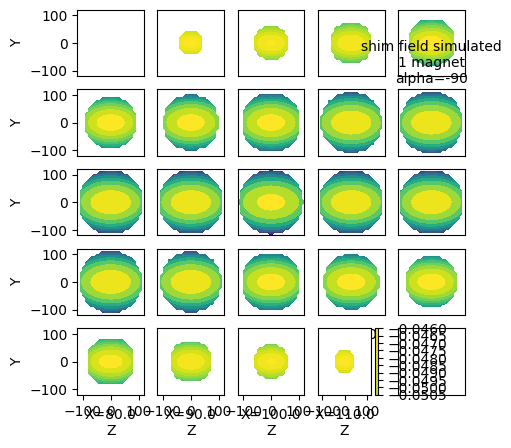

In [55]:
# what we expect with insert at min_z 0y ring 0:
plt.figure(0)

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(5, 5))

xvals = b0map_iter1.xDim_SPH_fine

for i in range(5):
    for j in range(5):
        if i*5+j >=24:
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(0.5, 5, 'shim field simulated\n1 magnet\nalpha=%.0f'%(alpha*180/np.pi) , horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].contourf(y,z,MagnetsField_simulated[i*5+j,:,:],vmin=np.nanmin(MagnetsField_simulated),vmax=np.nanmax(MagnetsField_simulated),origin = 'lower',extent=[-120,120,-120,120])
        axes[i,j].text(0.5, -0.3, 'X=%.1f'%xvals[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==4:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Z')
        axes[i,j].set_ylabel('Y')
        plt.xlabel('Z')
        plt.ylabel('Y')


plt.savefig('./pics/iter2_init_field_interp.png',format="png")
plt.savefig('./pics/iter2_init_field_interp.pdf',format="pdf")
plt.show()









(25, 25, 25, 3, 84)


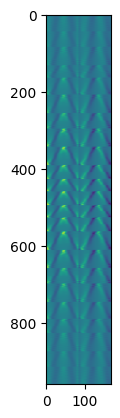

In [57]:
# now least squares for magnet rotation.
# generating the magnetic fields:
# magnet field is magnetFields[:,:,:,2,0]
# mask the magnet fields
b0map = b0map_iter1

DSV = b0map.path.radius*2 # 
DSV_INNER = b0map.path.radius*1.96 #!!!TEMP*1.96#1.95 # DEFINED ABOVE!
# make a spherical mask with diameter DSV
sphereMask = np.zeros(np.shape(coordinate_grid[0]), dtype = float)
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV/2)**2] = 1 
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV_INNER/2)**2] = 0 

sphereMask[sphereMask == 0] = np.nan

print(np.shape(magnetFields))

maskedFields = magnetFields[sphereMask == 1, :,:].astype(float) #!!! TEMP!!!!
maskedFields_stacked = np.hstack((maskedFields[:,1,:],maskedFields[:,2,:])) # WE HAVE Y AND Z


plt.imshow(maskedFields_stacked) #


In [58]:

# masking the magnet fields

print(np.shape(maskedFields_stacked))

vector_of_magnet_rotations = np.zeros(len(shimming_magnets))

stackedRotationVector = np.hstack([np.sin(vector_of_magnet_rotations),np.cos(vector_of_magnet_rotations)])
print(np.shape(stackedRotationVector))

rotatedFieldOfShimMagnetsStacked = np.matmul(maskedFields_stacked,stackedRotationVector)

print(np.shape(rotatedFieldOfShimMagnetsStacked))

(960, 168)
(168,)
(960,)


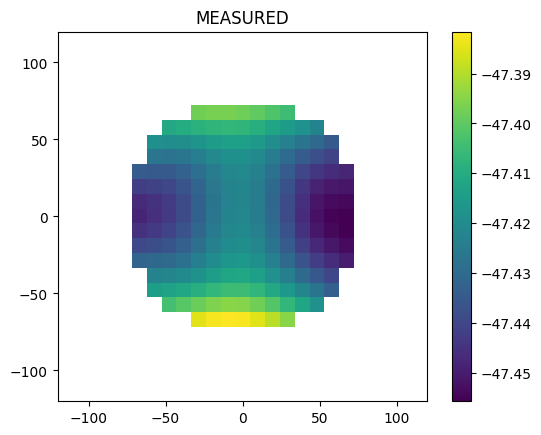

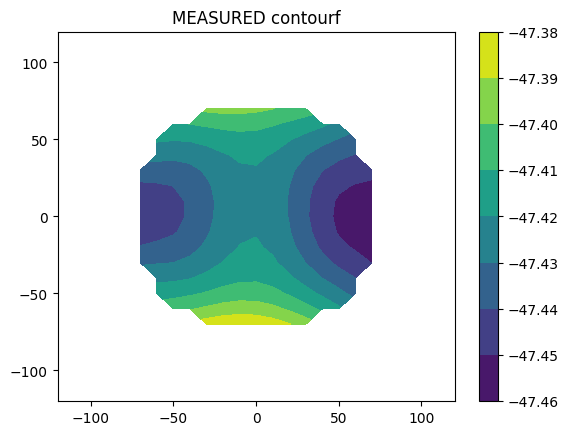

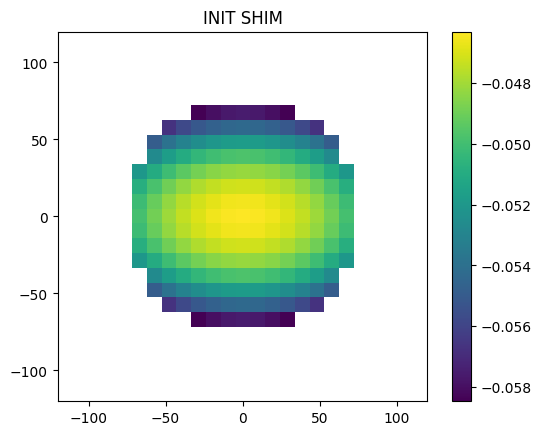

(960,)
(25, 25, 25)


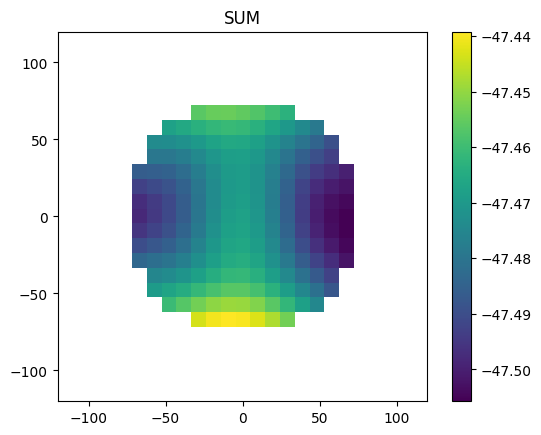

In [59]:
plt.imshow(FieldMeasured[3,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.title('MEASURED')
plt.colorbar()
plt.show()

plt.contourf(y,z,FieldMeasured[3,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.title('MEASURED contourf')
plt.colorbar()
plt.show()

plt.imshow(MagnetsField_simulated[3,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.title('INIT SHIM')
plt.colorbar()
plt.show()
plt.imshow(FieldMeasured[3,:,:]+1*MagnetsField_simulated[3,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.colorbar()
plt.title('SUM')


initialFieldMasked = FieldMeasured[sphereMask == 1]
print(np.shape(initialFieldMasked))
print(np.shape(FieldMeasured))

In [60]:
# ok now we have magnet fields and vector of magnet rotations. we can make fields now
def _dataFitting(shimVector):

            stackedRotationVector = np.hstack([np.sin(shimVector),np.cos(shimVector)])
            shimField = np.matmul(maskedFields_stacked,stackedRotationVector)+initialFieldMasked

            return np.square(((shimField)/np.mean(shimField)) -1)*1e9

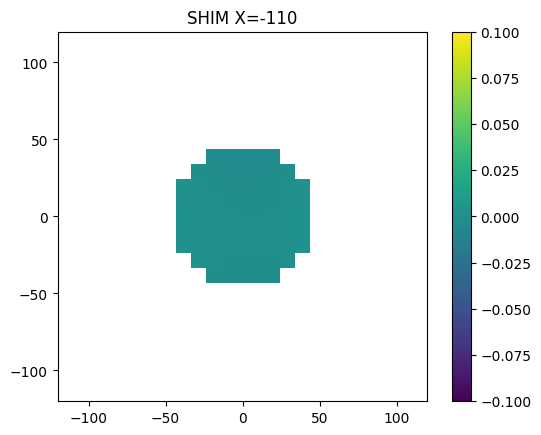

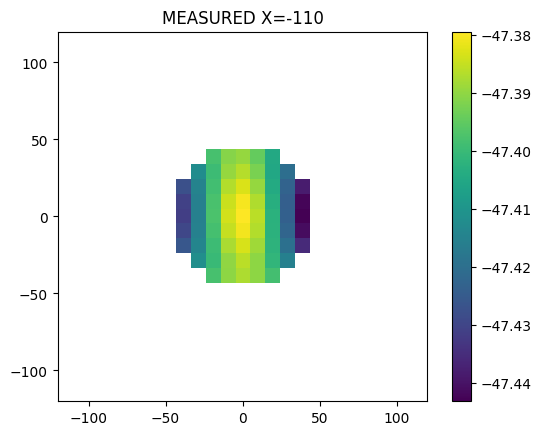

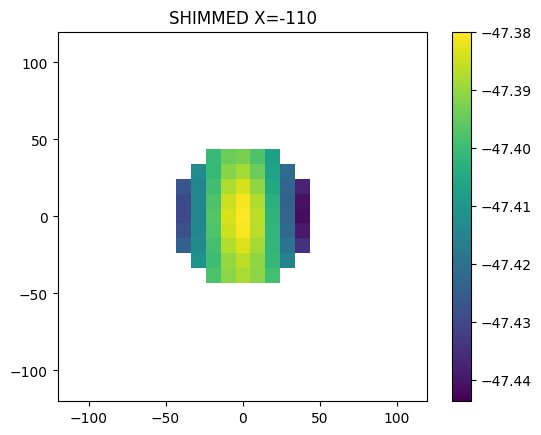

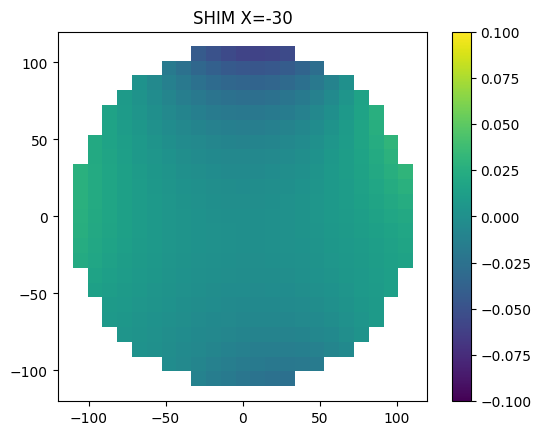

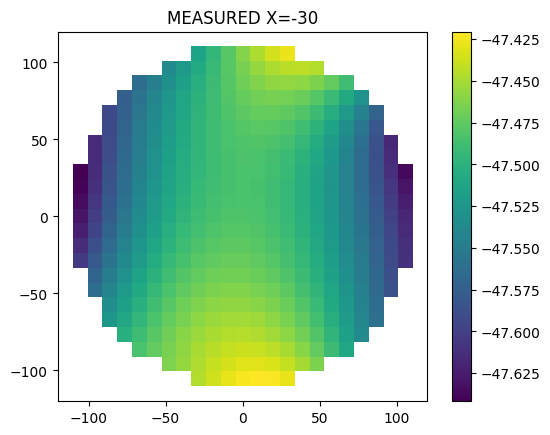

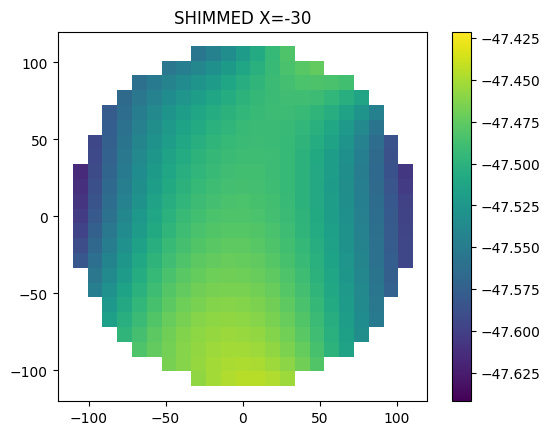

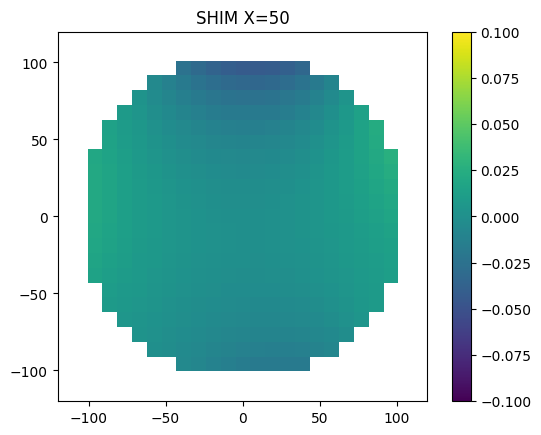

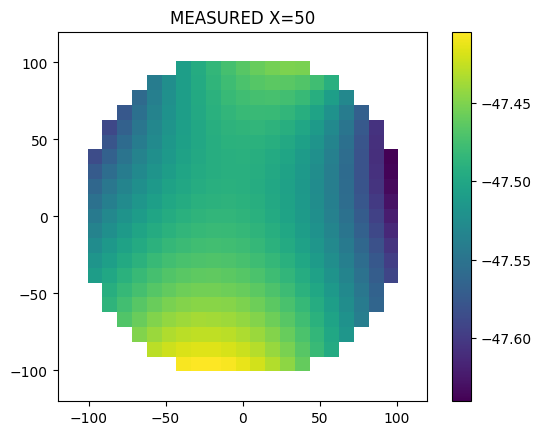

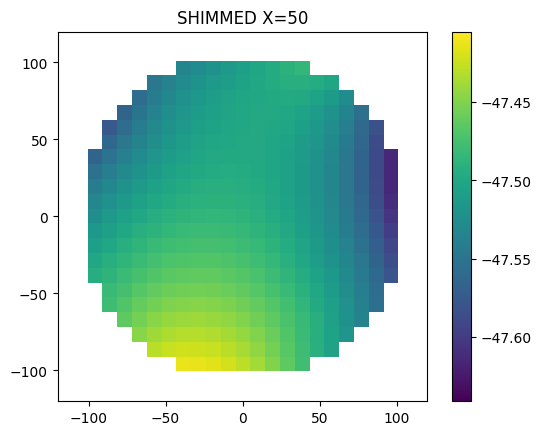

In [61]:
#render the field of rotated magnets
#optimized_vector_of_magnet_rotations = np.zeros(len(shimming_magnets))+np.pi/2#+np.pi/4*8.05#np.random.randint(40)*2*np.pi/40
optimized_vector_of_magnet_rotations = np.load('optIter2_1ring.npy')


optimized_shim_Field = np.matmul(magnetFields[...,1,:], np.sin(optimized_vector_of_magnet_rotations)) + np.matmul(magnetFields[...,2,:], np.cos(optimized_vector_of_magnet_rotations))
optimized_shim_Field*=b0map_iter1.sphere_mask
FieldShimmed = FieldMeasured+optimized_shim_Field


shimoffset = np.nanmean(FieldShimmed)-np.nanmean(initialField)

for slicenr in range(1,24,8):
#slicenr = 17
    plt.imshow(optimized_shim_Field[slicenr,:,:],vmin=-1e-1,vmax=1e-1,origin='lower',extent=[-120,120,-120,120])
    plt.colorbar()
    plt.title('SHIM X=%.0f'%xvals[slicenr])
    plt.show()
    plt.imshow(FieldMeasured[slicenr,:,:],origin='lower',vmin=np.nanmin(FieldMeasured[slicenr,:,:]),vmax = np.nanmax(FieldMeasured[slicenr,:,:]),extent=[-120,120,-120,120])
    plt.colorbar()
    plt.title('MEASURED X=%.0f'%xvals[slicenr])
    plt.show()
    plt.imshow(FieldShimmed[slicenr,:,:],origin='lower',
            vmin=np.nanmin(initialField[slicenr,:,:]+shimoffset),
            vmax = np.nanmax(initialField[slicenr,:,:]+shimoffset),
            extent=[-120,120,-120,120])
    plt.colorbar()
    plt.title('SHIMMED X=%.0f'%xvals[slicenr])
    plt.show()



In [62]:
# now do the least squares optimization
vector_of_magnet_rotations =np.load('optIter2_1ring.npy')#
#vector_of_magnet_rotations = np.zeros(len(shimming_magnets))#+0*np.pi/2#vector_of_magnet_rotations*0 ##
cost = _dataFitting(vector_of_magnet_rotations)

print(np.sum(cost))

# least squares optimization of the rotation vector
from scipy.optimize import least_squares

initialGuess = vector_of_magnet_rotations
#initialGuess[initialGuess<0.001] = 0.001
lsqData = least_squares(_dataFitting, initialGuess, max_nfev=6400, xtol = 1e-6,ftol=0, verbose=2,bounds=(initialGuess*0,initialGuess*0+2*np.pi))


1582520.3364827358
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.6249e+09                                    5.15e+08    
       1              2         1.3613e+09      1.26e+09       4.91e+00       2.43e+08    
       2              3         1.0677e+09      2.94e+08       5.93e+00       1.87e+08    


C:\Users\kuliko02\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_lsq\least_squares.py:824: UserWarning: Setting `ftol` below the machine epsilon (2.22e-16) effectively disables the corresponding termination condition.
  ftol, xtol, gtol = check_tolerance(ftol, xtol, gtol, method)


       3              4         9.1664e+08      1.51e+08       2.83e+00       8.66e+07    
       4              6         8.1382e+08      1.03e+08       1.40e+00       5.78e+07    
       5              7         7.2687e+08      8.69e+07       2.50e+00       4.56e+07    
       6              9         6.9043e+08      3.64e+07       1.33e+00       2.35e+07    
       7             10         6.6084e+08      2.96e+07       2.29e+00       5.29e+07    
       8             12         6.4296e+08      1.79e+07       8.48e-01       1.58e+07    
       9             13         6.3582e+08      7.14e+06       6.01e-01       5.82e+06    
      10             14         6.3007e+08      5.75e+06       4.35e-01       7.11e+06    
      11             16         6.2748e+08      2.58e+06       2.55e-01       1.98e+06    
      12             17         6.2309e+08      4.39e+06       3.09e-01       6.29e+06    
      13             19         6.2162e+08      1.48e+06       2.67e-01       4.64e+06    

In [64]:
optimized_vector_of_magnet_rotations = lsqData.x
np.save('optIter2_1ring.npy',optimized_vector_of_magnet_rotations)
print(optimized_vector_of_magnet_rotations*180/np.pi)
print(np.mean(optimized_vector_of_magnet_rotations*180/np.pi))

shimFieldRendered = shimming_magnets[0].B0[:,:,:,1]*0
    

for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]
    print(alpha)
    magnet.rotation_yz = alpha#+(np.pi/2-abs(alpha-np.pi/2))*1.41#+2*np.pi/4
    magnet.bRem = bRem
    magnet.render_field(grid=coordinate_grid)
    shimFieldRendered += magnet.B0[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)

shimField_fair = initialField+shimFieldRendered*1.0e3#[:,:,:]*1+np.multiply(shimFieldRendered[:,:,:,2]*1000,lsqData.x)#+shimFieldRendered[:,:,:,1]*1000 #???? why 1st not 2nd component!?!!s


optimized_shim_Field = np.matmul(magnetFields[...,1,:], np.sin(lsqData.x)) + np.matmul(magnetFields[...,2,:], np.cos(lsqData.x))


shimmed_Field_final = initialField+optimized_shim_Field

homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_cheap = (np.nanmax(shimmed_Field_final)-np.nanmin(shimmed_Field_final))/np.nanmean(shimmed_Field_final)*1e6
print('homo cheap ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_cheap)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmean(initialField)),abs(np.nanmean(shimmed_Field_final))))


homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_fair = (np.nanmax(shimField_fair)-np.nanmin(shimField_fair))/np.nanmean(shimField_fair)*1e6
print('homo fair ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_fair)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmean(initialField)),abs(np.nanmean(shimField_fair))))

shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
#d = np.shape(coordinate_grid[0])
#print(d[0])


[4.44855880e+01 3.60000000e+02 3.60000000e+02 3.59999593e+02
 2.98724201e+02 1.64791994e+02 1.60981376e+02 1.32653255e+02
 1.23415920e+02 1.14142288e+02 1.04877552e+02 9.56512603e+01
 8.64660959e+01 7.73166810e+01 4.64534071e+01 3.60000000e+02
 2.72854052e+01 1.72437694e+01 3.60000000e+02 3.55694538e+02
 3.43920503e+02 1.05614396e-36 3.59019041e-37 1.89315370e-37
 2.50657753e+02 2.35775809e+02 2.21935424e+02 2.09222474e+02
 1.73582433e+02 1.64451877e+02 1.55771073e+02 1.47440164e+02
 1.39368391e+02 1.31483905e+02 1.23724413e+02 9.79769232e+01
 9.01955056e+01 8.22927965e+01 7.42259482e+01 3.60000000e+02
 3.60000000e+02 3.60000000e+02 3.60000000e+02 3.59683094e+02
 3.46311030e+02 3.24821642e+02 2.90417628e+02 2.42890600e+02
 2.05957261e+02 1.50434210e+02 1.39706388e+02 3.60000000e+02
 3.60000000e+02 1.11353429e+02 1.02541251e+02 9.38848154e+01
 6.53594301e+01 5.68196777e+01 4.81863476e+01 3.93986741e+01
 3.60000000e+02 3.60000000e+02 3.60000000e+02 3.34167994e+02
 3.21024625e+02 1.012220

In [65]:
print('from')
print(np.nanmax(initialField))
print(np.nanmin(initialField))
print('<',np.nanmean(initialField),'>')


print('to')
print(np.nanmax(shimField_fair))
print(np.nanmin(shimField_fair))
print('<',np.nanmean(shimField_fair),'>')



from
-47.34100154995108
-47.65079320764249
< -47.49263368741273 >
to
-47.3123219704547
-47.54127944802945
< -47.442639657192956 >


<Figure size 640x480 with 0 Axes>

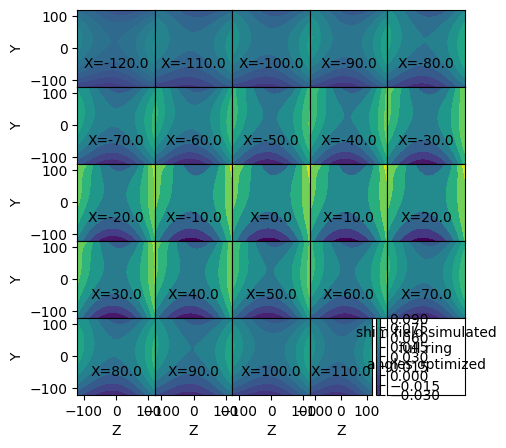

In [67]:
# SHIM FIELD
plt.figure(0)

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(5, 5))

xvals = b0map_iter1.xDim_SPH_fine


for i in range(5):
    for j in range(5):
        if i*5+j >=24:
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(0.5, 0.6, 'shim field simulated\nfull ring\nangles optimized' , horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        #xxx = axes[i,j].imshow(optimized_shim_Field[i*5+j,:,:],clim=[np.nanmin(optimized_shim_Field),np.nanmax(optimized_shim_Field)],origin = 'lower',extent=[-120,120,-120,120])
        xxx = axes[i,j].contourf(y,z,optimized_shim_Field[i*5+j,:,:],vmin=np.nanmin(optimized_shim_Field),vmax=np.nanmax(optimized_shim_Field))
        
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==4:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Z')
        axes[i,j].set_ylabel('Y')
        #plt.xlabel('Z')
        #plt.ylabel('Y')
        
plt.subplots_adjust(wspace=-0.0, hspace=0)
plt.savefig('./pics/shim_field_ITER2_1RING.png',format="png")
plt.savefig('./pics/shim_field_ITER2_1RING.pdf',format="pdf")
plt.show()






shimmed simulated HOMO,ppm: 4825.985082518092


<Figure size 640x480 with 0 Axes>

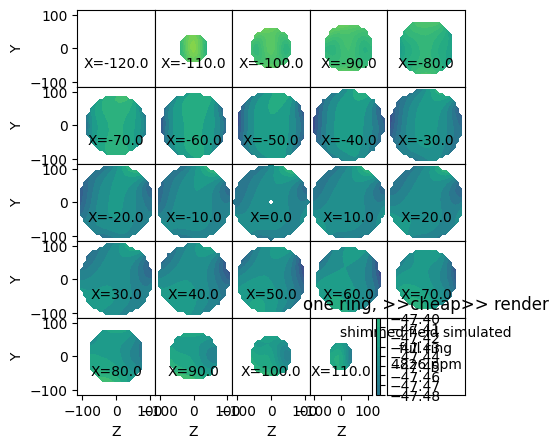

In [69]:
# SHIMMED field
plt.figure(0)

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(5, 5))

shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)

homoshimmed = abs((np.nanmax(shimmed_Field_final)-np.nanmin(shimmed_Field_final))/np.nanmean(shimmed_Field_final)*1e6)
print('shimmed simulated HOMO,ppm:',homoshimmed)


for i in range(5):
    for j in range(5):
        if i*5+j >=24:
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(0.5, 0.6, 'shimmed field simulated\nfull ring\n%.0f ppm'%homoshimmed , horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].contourf(shimmed_Field_final[i*5+j,:,:],vmin=np.nanmin(initialField)+shimoffset,vmax=np.nanmax(initialField)+shimoffset,origin = 'lower',extent=[-120,120,-120,120])
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==4:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Z')
        axes[i,j].set_ylabel('Y')
        plt.xlabel('Z')
        plt.ylabel('Y')
        
plt.title('one ring, >>cheap>> render')        
plt.subplots_adjust(wspace=-0.0, hspace=0)
plt.savefig('./pics/shimmed_field_ITER2_1ring.png',format="png")
plt.savefig('./pics/shimmed_field_ITER2_1ring.pdf',format="pdf")
plt.show()






Y 0.27211479674710887 Z -0.04614691096140277 a 44.485587969050464
Y 0.2742709847847707 Z -0.030845208788272026 a 359.9999999999999
Y 0.27556740718070843 Z -0.015446815196073495 a 359.9999999976867
Y 0.276 Z 0.0 a 359.9995925431841
Y 0.27556740718070843 Z 0.0154468151960735 a 298.72420102891266
Y 0.2742709847847707 Z 0.030845208788272037 a 164.79199402839643
Y 0.27211479674710887 Z 0.04614691096140277 a 160.98137616427985
Y 0.2587317822093368 Z 0.09609300117480107 a 132.65325494138585
Y 0.2529482447387227 Z 0.11042275799670676 a 123.41592048551352
Y 0.2463717826715406 Z 0.12440636922299107 a 114.1422880084668
Y 0.2390230114445051 Z 0.13799999999999998 a 104.87755221981755
Y 0.2309249674754671 Z 0.15116103795771738 a 95.65126034604481
Y 0.22210303595045067 Z 0.16384822678806393 a 86.46609589610962
Y 0.21258487124793404 Z 0.17602179557230782 a 77.31668095720057
Y 0.17602179557230782 Z 0.21258487124793404 a 46.45340712011516
Y 0.16384822678806393 Z 0.22210303595045067 a 359.99999999999994


Text(0, 0.5, 'Z')

<Figure size 640x480 with 0 Axes>

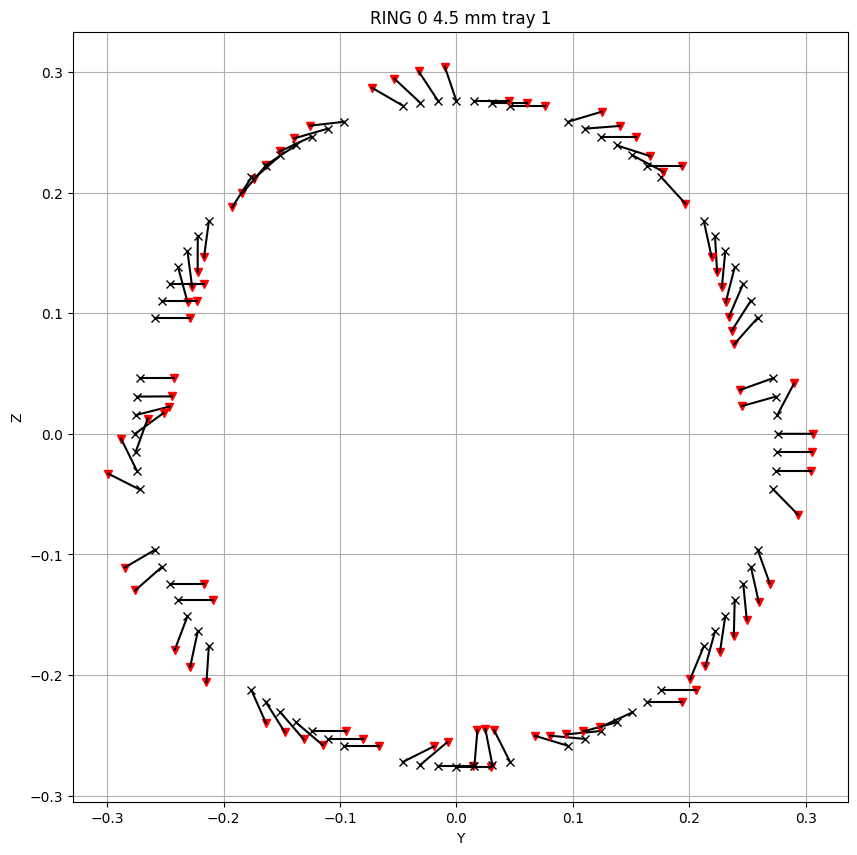

In [72]:
# MAGNET ROTATIONS RING 0
#plotting rotations

ring_number = 0
ringPosition = ringPositions[ring_number]
plt.figure(0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.title('RING %d %.1f mm tray %d'%(ring_number,1e3*ringPosition,trays_occupied[ring_number]))
dispveclen = 3e-2 # length of displayed rotation vector 

for idx,tmppos in enumerate(positions):
    if tmppos[0] == ringPosition:
        angle = optimized_vector_of_magnet_rotations[idx]
        print('Y',tmppos[1],'Z',tmppos[2],'a',angle*180/np.pi)
        axes.plot(tmppos[1],tmppos[2],'xk')
        direction = [dispveclen*np.cos(-angle),dispveclen*np.sin(-angle)] #!!!!!!!!! 240916
        axes.plot(tmppos[1]+direction[0],tmppos[2]+direction[1],'rv')
        axes.plot([tmppos[1],tmppos[1]+direction[0]],[tmppos[2],tmppos[2]+direction[1]],'k-')
        

plt.grid(1)
plt.xlabel('Y')
plt.ylabel('Z')



In [59]:
#?--- REALITY
#? --- REAL MAP RECORDED ---

In [ ]:
# --- REALITY WAS: --- 
# one ring with fixed euler rotations, sim promises 2500 ppm
# 1. import the b0 map


import numpy as np  
import b0
b0map_shell = b0.b0()
filename_to_import_csv_data_from = r'./data/240907/240911_sphere_20pts_no_rings_bvals.csv'
b0map_shell.import_from_csv(filename_to_import_csv_data_from,eulers=[90,0,-90])


In [ ]:
#calculate preliminary homogeneity
rawdata = b0map_shell.fieldDataAlongPath
filteredB0vals = np.zeros(len(rawdata))

for idx,val in enumerate(rawdata):
    B0 = val[0]
    if B0 == 0:
        val = rawdata[idx-1]
        B0=val[0]
    filteredB0vals[idx]=B0
    
print(max(filteredB0vals))
print(min(filteredB0vals))
meanval = np.nanmean(filteredB0vals)

for idx,val in enumerate(filteredB0vals):
    if abs(val/meanval)>2 or abs(val/meanval)<0.5 or val/meanval<0:
        filteredB0vals[idx] = filteredB0vals[idx-1]
        print(val)
        
maxval = max(filteredB0vals)
minval = min(filteredB0vals)
meanval = np.nanmean(filteredB0vals)

print(maxval)
print(minval)
print(meanval)

homoshell = (maxval-minval)/meanval*1e6

print('homo on shell:%.0f'%homoshell)



In [ ]:
# --- REALITY IS: --- 
# one ring with fixed euler rotations, sim promises 2500 ppm
# 1. import the b0 map


import numpy as np  
import b0
b0map_shell_after = b0.b0()
filename_to_import_csv_data_from = r'./data/240907/240912_sphere_20pts_1_ring_bvals.csv'
b0map_shell_after.import_from_csv(filename_to_import_csv_data_from,eulers=[90,0,-90])

In [ ]:
#calculate preliminary homogeneity
rawdata = b0map_shell_after.fieldDataAlongPath
filteredB0vals = np.zeros(len(rawdata))

for idx,val in enumerate(rawdata):
    B0 = val[0]
    if B0 == 0:
        val = rawdata[idx-1]
        B0=val[0]
    filteredB0vals[idx]=B0
    
print(max(filteredB0vals))
print(min(filteredB0vals))
meanval = np.nanmean(filteredB0vals)

for idx,val in enumerate(filteredB0vals):
    if abs(val/meanval)>2 or abs(val/meanval)<0.5 or val/meanval<0:
        filteredB0vals[idx] = filteredB0vals[idx-1]
        print(val)
        
maxval = max(filteredB0vals)
minval = min(filteredB0vals)
meanval = np.nanmean(filteredB0vals)

print(maxval)
print(minval)
print(meanval)

homoshell = (maxval-minval)/meanval*1e6

print('homo on shell:%.0f'%homoshell)

In [ ]:
# spherical decomposition
diameter_of_sphere = b0map_test_ring_reality.path.radius*2
order = 17
resolution_of_sph_decomp = 10
print(diameter_of_sphere)

b0map_test_ring_reality.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)

resolution_of_sph_fit=8
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

b0map_test_ring_reality.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)


In [ ]:
# REAL field (interpolated)
# save REAL field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals = b0map_test_ring_reality.xDim_SPH_fine
ShimmedFieldMeasured = b0map_test_ring_reality.interpolatedField
mapsize = int(np.sqrt(len(ShimmedFieldMeasured[:,0,0])))

shimoffset = np.nanmean(ShimmedFieldMeasured)-np.nanmean(FieldMeasured)

fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))


print(np.nanmean(ShimmedFieldMeasured))

print(np.nanmin(ShimmedFieldMeasured),np.nanmax(ShimmedFieldMeasured))

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(ShimmedFieldMeasured[i+j*mapsize,:,:],clim=[np.nanmin(FieldMeasured)+shimoffset,np.nanmax(FieldMeasured)+shimoffset],origin='lower')
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)

measuredHomo = abs((np.nanmax(ShimmedFieldMeasured)-np.nanmin(ShimmedFieldMeasured))/np.nanmean(ShimmedFieldMeasured)*1e6)
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIMMED measured\n%.0f ppm'%measuredHomo)

plt.savefig('./pics/iter2_onering_real_field.png',format="png")
plt.savefig('./pics/iter2_onering_real_field.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

In [ ]:
# now lets get the measured field with the simulation using the rotations and varying the strength
# SHIMMED field
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_iter1.xDim_SPH_fine



d = np.shape(coordinate_grid[0])
print(d[0])

#!!! TST !!!
shimFieldRendered = shimming_magnets[0].B0[:,:,:,2]*0
for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]
    print(alpha)
    magnet.rotation_yz = alpha#+(np.pi/2-abs(alpha-np.pi/2))*1.41#+2*np.pi/4
    magnet.bRem = bRem
    pos = positions[idx]
    magnet.position = [pos[0],pos[1],pos[2]]
    magnet.render_field(grid=coordinate_grid)
    shimFieldRendered += magnet.B0[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)

shimmed_Field_final = initialField+shimFieldRendered*1.0e3#[:,:,:]*1+np.multiply(shimFieldRendered[:,:,:,2]*1000,lsqData.x)#+shimFieldRendered[:,:,:,1]*1000 #???? why 1st not 2nd component!?!!s


#!!!!!!!!!!!!

homoshimmed = abs((np.nanmax(shimmed_Field_final)-np.nanmin(shimmed_Field_final))/np.nanmean(shimmed_Field_final)*1e6)
shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
print('shimmed simulated HOMO,ppm:',homoshimmed)

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(shimmed_Field_final[i+j*mapsize,:,:],clim=[1.00*np.nanmin(initialField)+shimoffset,1.00*np.nanmax(initialField)+shimoffset],origin='lower')
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIMMED var simulated\n%.0f ppm'%homoshimmed)

plt.savefig('./pics/shimmed_field_ITER2_1ring.png',format="png")
plt.savefig('./pics/shimmed_field_ITER2_1ring.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

 

In [ ]:
# difference between measured shimmed and intial
diff_measured_field = shimmed_Field_final-ShimmedFieldMeasured
plt.figure(0)

mapsize = int(np.sqrt(len(diff_measured_field[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_iter1.xDim_SPH_fine



d = np.shape(coordinate_grid[0])
print(d[0])

g=3e-2

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(diff_measured_field[i+j*mapsize,:,:],clim=[-g,g])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('VARSIM - REALMEAS')

plt.savefig('./pics/diff_field_ITER2_1ring.png',format="png")
plt.savefig('./pics/diff_field_ITER2_1ring.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

